# **• Tahap 1: Importing & EDA**

In [563]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [564]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Statistical Summary

In [566]:
num_col = df.select_dtypes('number')
num_col.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [567]:
cat_col = df.select_dtypes('object')
cat_col.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [568]:
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

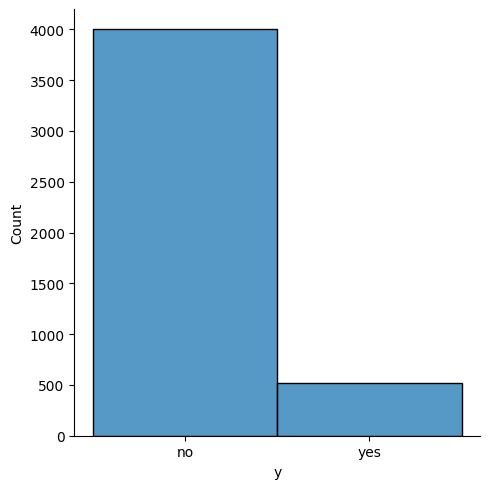

In [569]:
sns.displot(df['y'])
plt.show()

In [570]:
df.duplicated().sum()

np.int64(0)

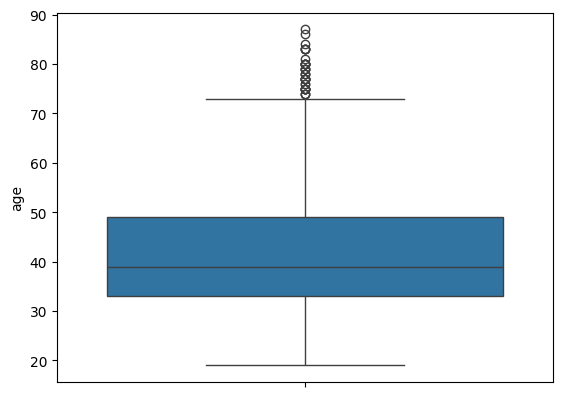

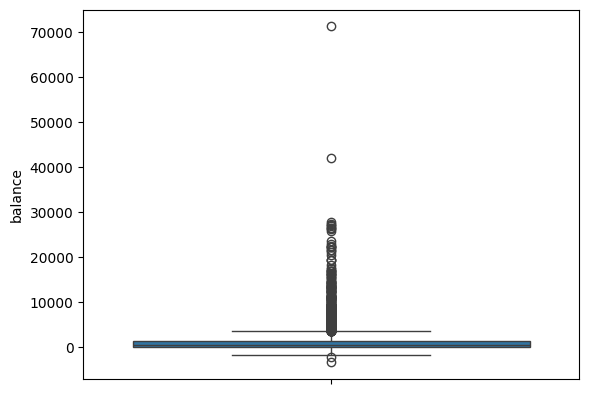

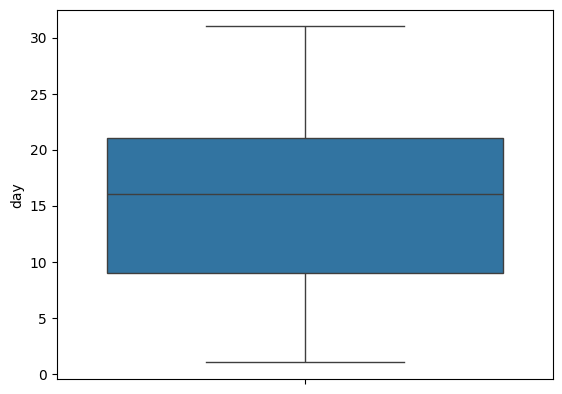

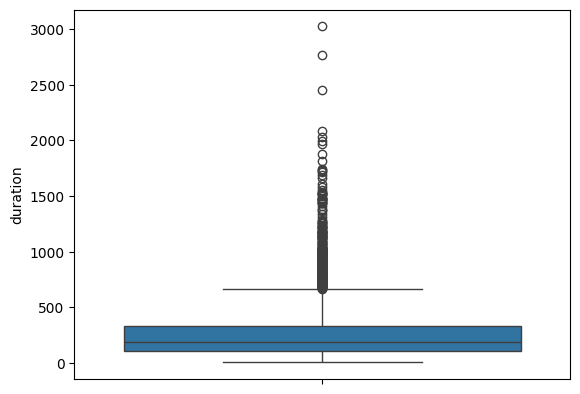

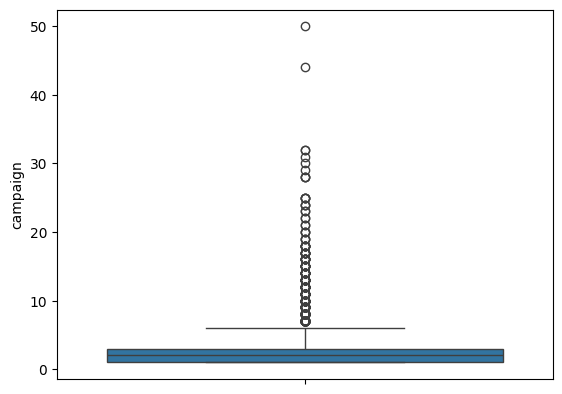

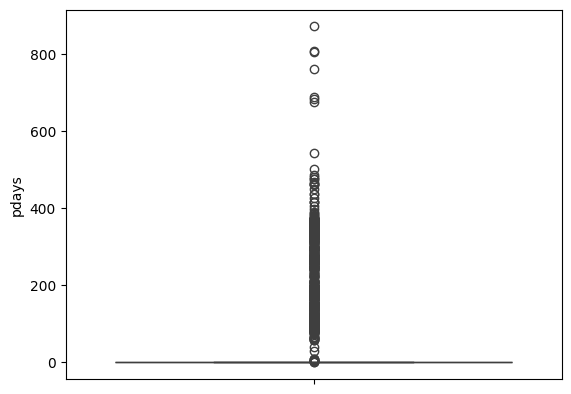

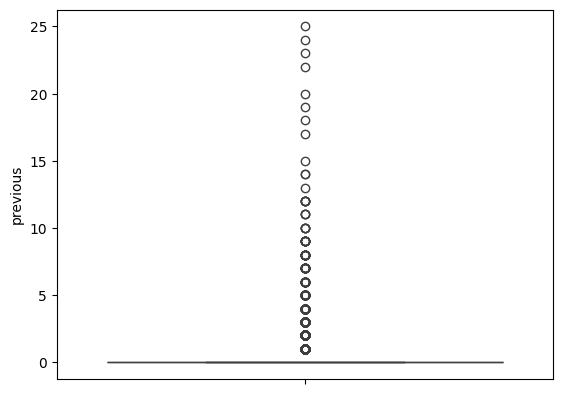

In [571]:
for col in num_col.columns:
    sns.boxplot(df[col])
    plt.show()

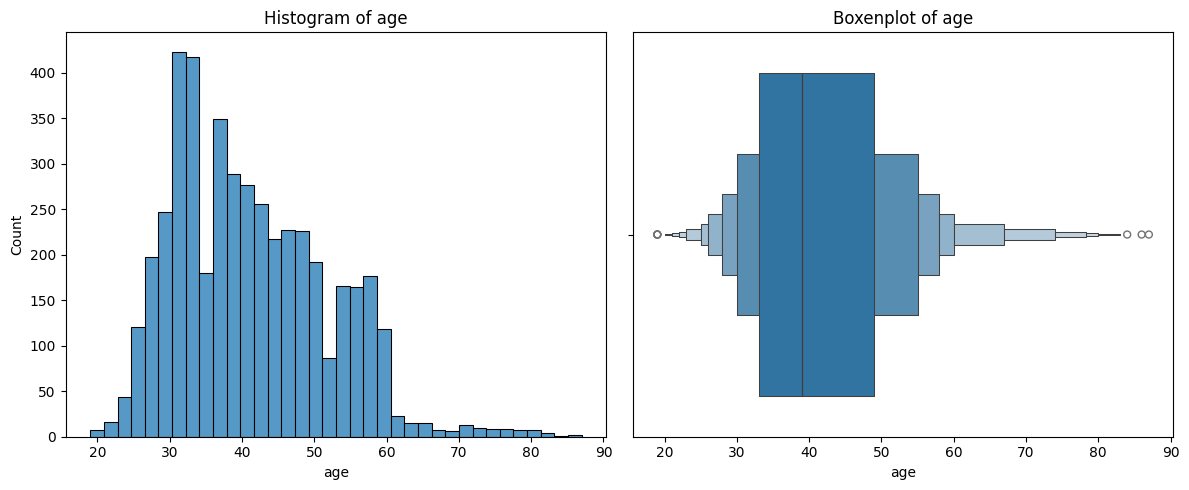

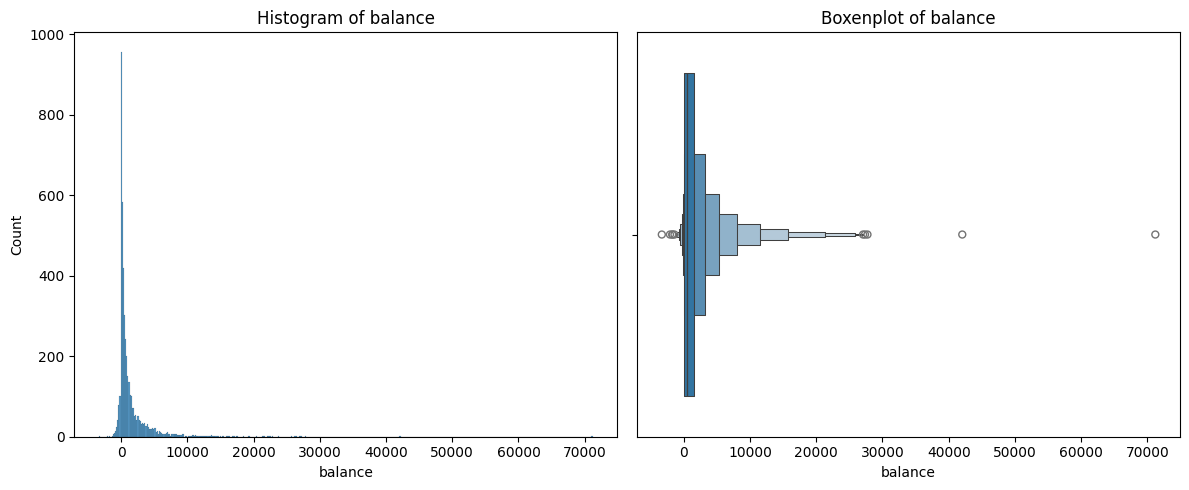

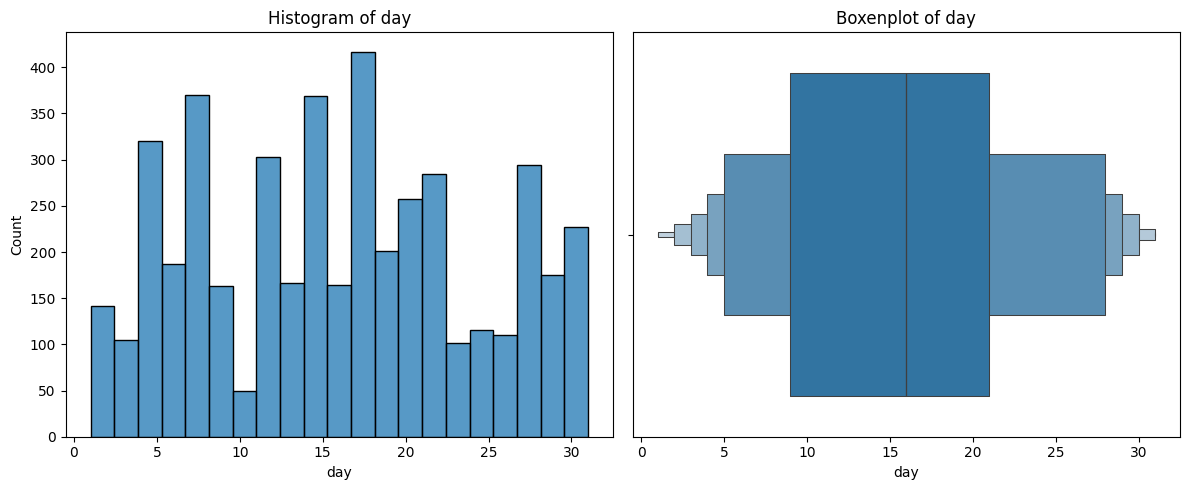

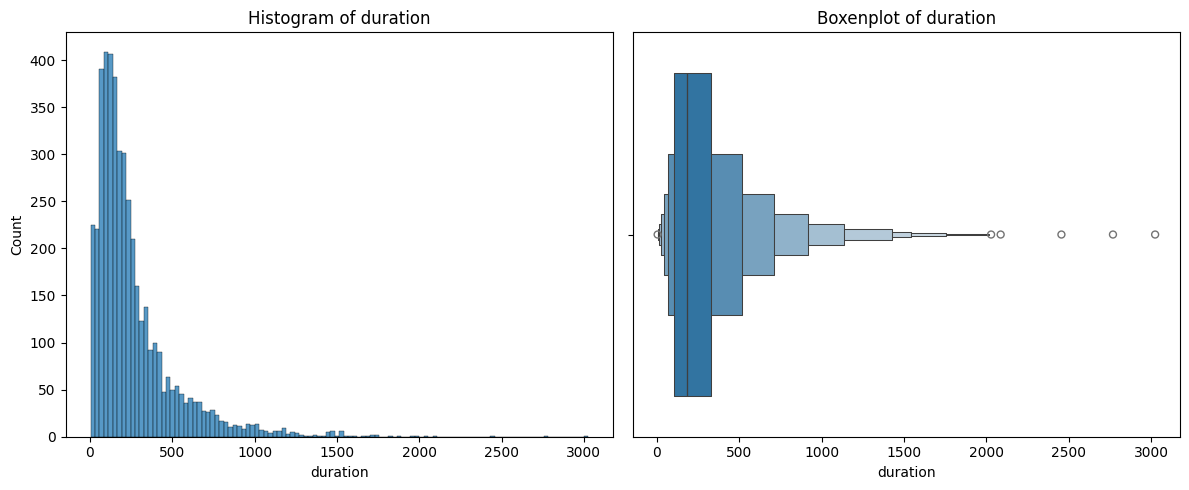

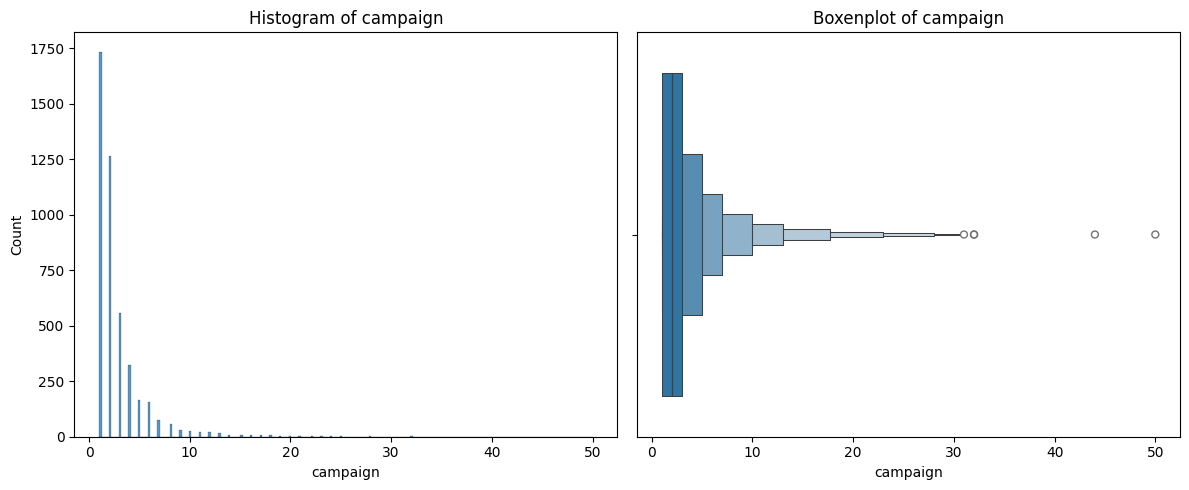

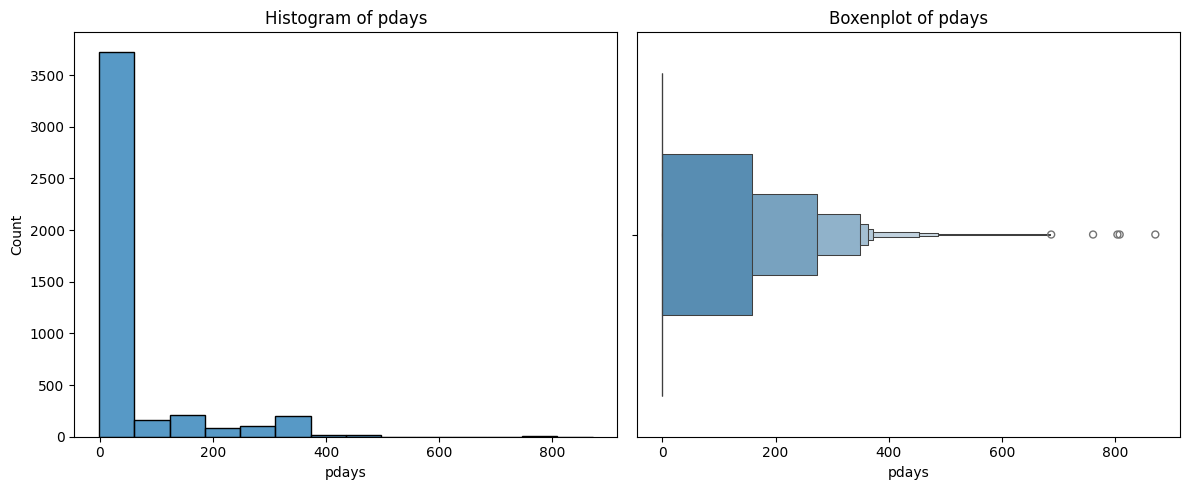

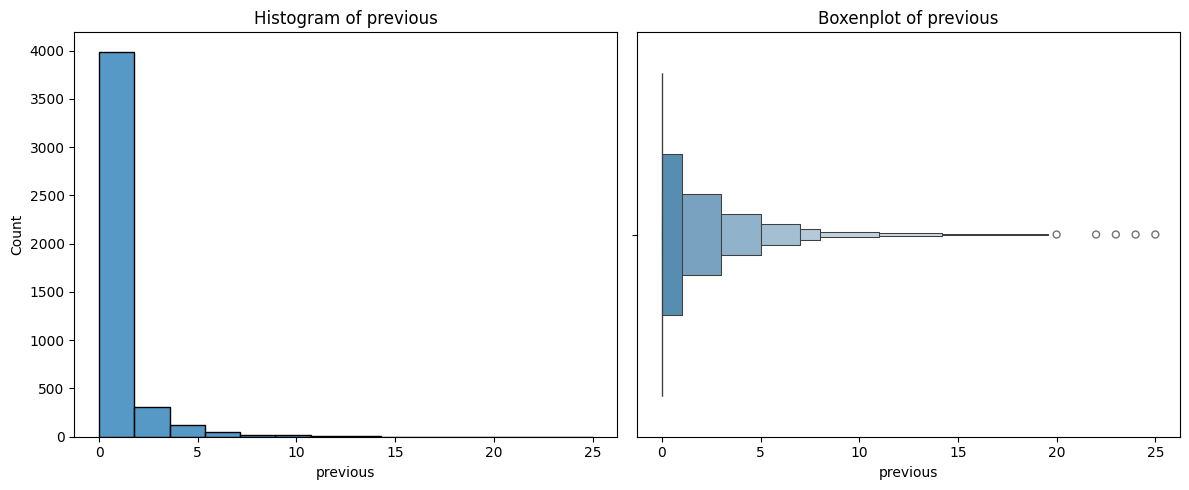

In [572]:
for i in num_col.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram (Distribution Plot)
    sns.histplot(df[i], ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')
    
    # Boxplot
    sns.boxenplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Boxenplot of {i}')

    plt.tight_layout()
    plt.show()

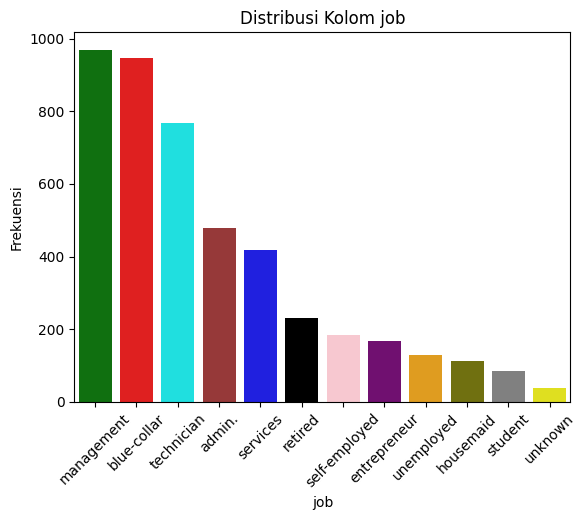

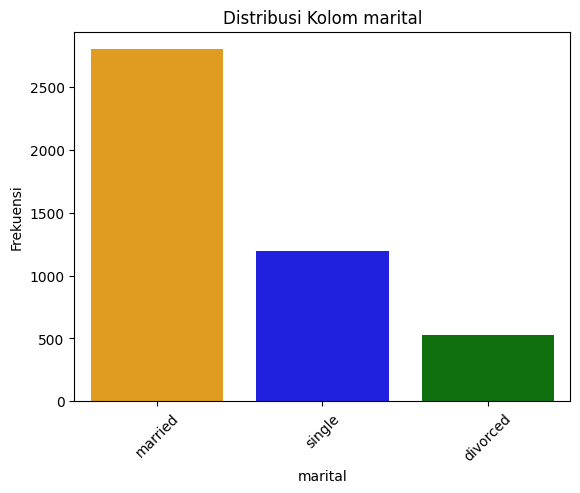

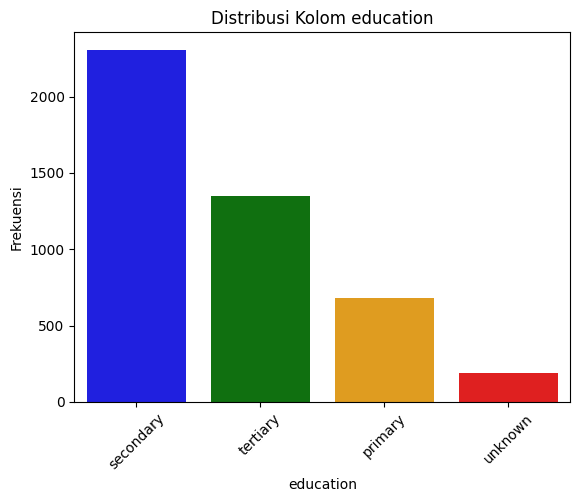

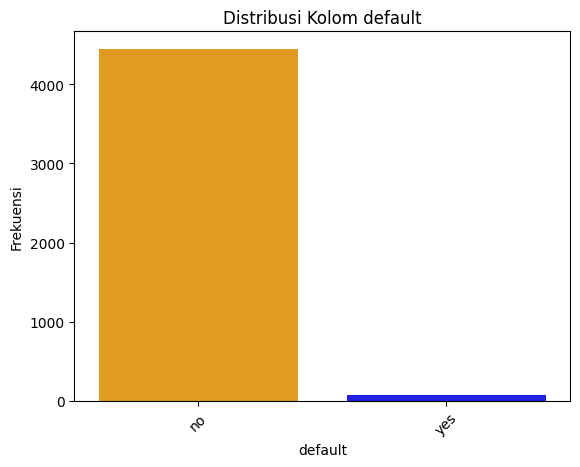

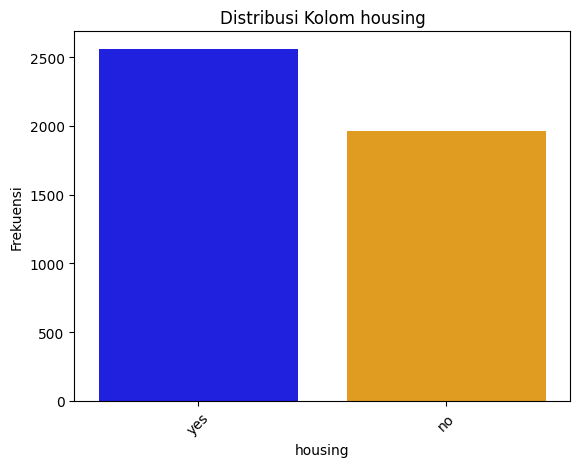

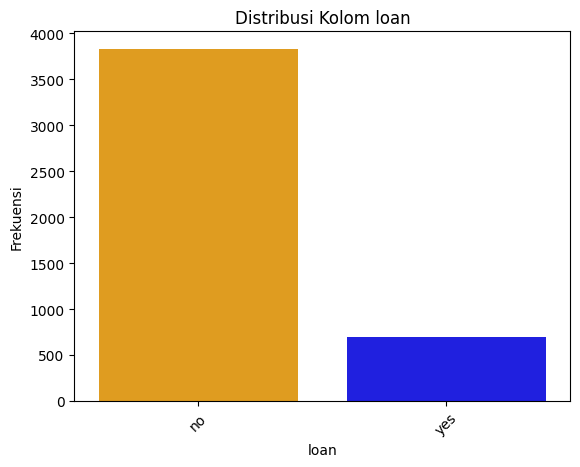

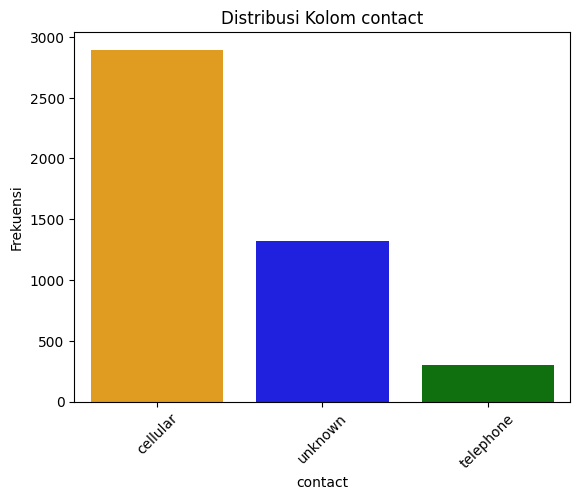

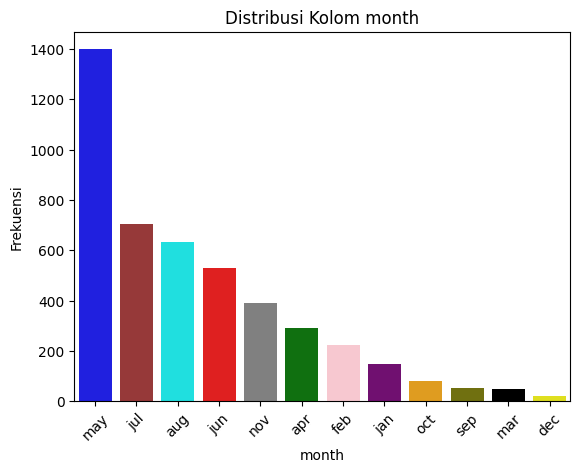

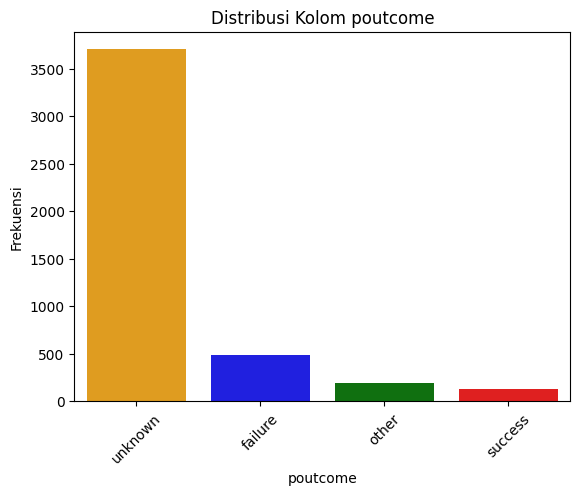

In [573]:
colors = ['orange', 'blue', 'green', 'red', 'pink', 'cyan', 'purple', 'brown', 'gray', 'olive', 'black', 'yellow']
for col in cat_col.columns:
    if col != 'y':
        unique_values = cat_col[col].nunique()
        palette = colors[:unique_values]
        sns.countplot(data=cat_col, x=col, hue=col, order=cat_col[col].value_counts().index, palette=palette, legend=False)  
        plt.title(f'Distribusi Kolom {col}')
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45)
        plt.show()

In [574]:
q1 = num_col['balance'].quantile(0.25)
q3 = num_col['balance'].quantile(0.75)
iqr = q3 - q1
lwr = q1 - 1.5 * iqr
upr = q3 + 1.5 * iqr
outliers = num_col[(num_col['balance'] < lwr) | (num_col['balance'] > upr)]
outliers

,age,balance,day,duration,campaign,pdays,previous
1,33,4789,11,220,1,339,4
10,39,9374,20,273,1,-1,0
16,56,4073,27,239,5,-1,0
25,41,5883,20,182,2,-1,0
30,68,4189,14,897,2,-1,0
...,...,...,...,...,...,...,...
4464,53,4554,5,8,6,-1,0
4473,33,4790,20,137,1,272,2
4489,45,6945,5,131,5,356,3
4500,38,4196,12,193,2,-1,0


In [575]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Insights: 

#### 1. **Data sangat beragam namun kekurangan kejelasan** karena nama kolom yang tidak jelas (poutcome, previous, pdays).
#### 2. **Beberapa kolom memiliki value unknown, beberapa kami anggap sebagai error dari pengisi data**. Namun, **terdeteksi manipulasi data yang membuat data sangat tidak seimbang** dan tidak masuk akal.
#### 3. **Beberapa kolom numerik memiliki value dibawah 0, atau minus.** Untuk beberapa kolom, kami menganggapnya sebagai error dari pengisi data. Namun untuk **balance kami buat pengecualian** atas dasar bahwa **balance seseorang di bank bisa menyentuh angka minus**.


# **• Tahap 2: Data Pre-processing**

### Berdasarkan hasil EDA, lakukan data pre-processing untuk menyiapkan dataset sebelum digunakan dalam Machine Learning.

In [576]:
dfc = df.copy(deep=True)

In [577]:
education_mode = cat_col['education'].mode()[0]
cat_col['education'] = cat_col['education'].replace('unknown', education_mode)
dfc['education'] = dfc['education'].replace('unknown', education_mode)

job_mode = cat_col['job'].mode()[0]
cat_col['job'] = cat_col['job'].replace('unknown', job_mode)
dfc['job'] = dfc['job'].replace('unknown', job_mode)

In [578]:
unknown_indices = cat_col[cat_col['poutcome'] == 'unknown'].index

num_unknown = len(unknown_indices)
num_other = num_unknown // 3
num_success = num_unknown // 3
num_failure = num_unknown - num_other - num_success

cat_col.loc[unknown_indices[:num_other], 'poutcome'] = 'other'
cat_col.loc[unknown_indices[num_other:num_other + num_success], 'poutcome'] = 'success'
cat_col.loc[unknown_indices[num_other + num_success:], 'poutcome'] ='failure'
dfc.loc[unknown_indices[:num_other], 'poutcome'] = 'other'
dfc.loc[unknown_indices[num_other:num_other + num_success], 'poutcome'] = 'success'
dfc.loc[unknown_indices[num_other + num_success:], 'poutcome'] ='failure'

In [579]:
cat_col['contact'] = cat_col['contact'].replace('unknown', 'telephone')
dfc['contact'] = dfc['contact'].replace('unknown', 'telephone')

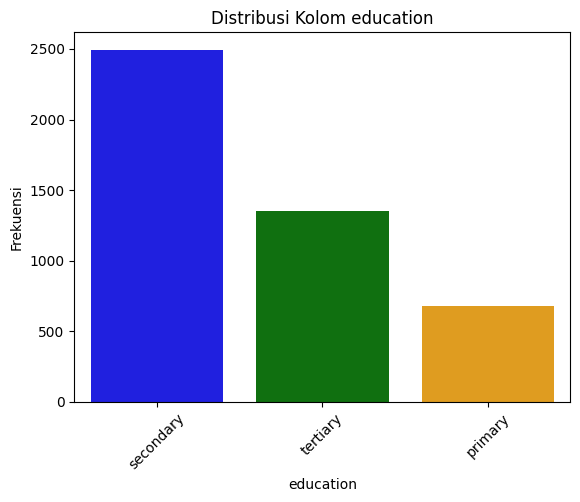

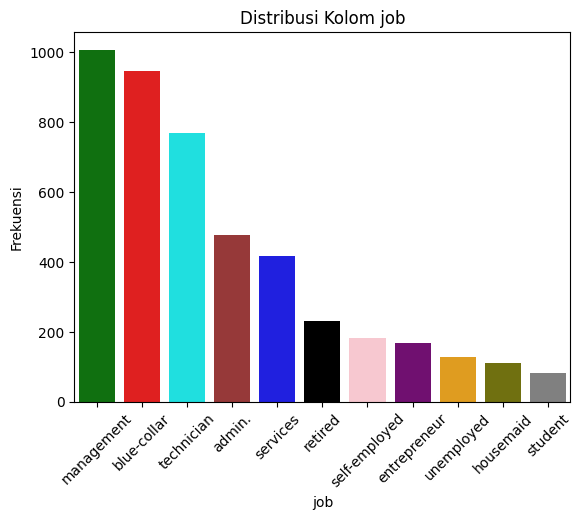

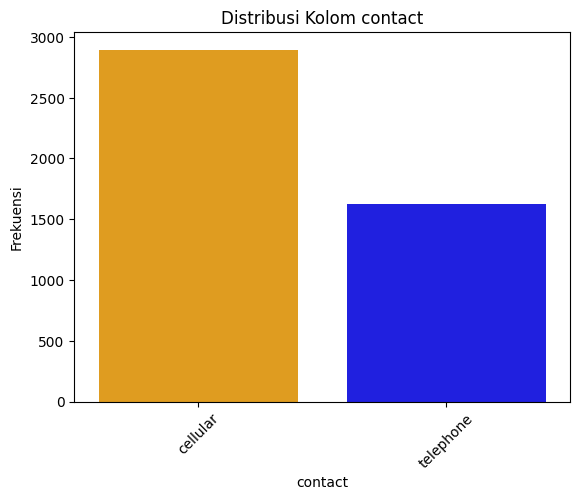

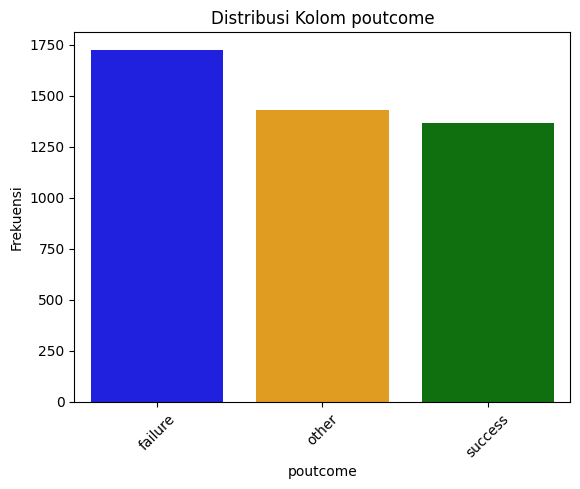

In [580]:
for col in cat_col[['education', 'job', 'contact', 'poutcome']]:
    unique_values = cat_col[col].nunique()
    palette = colors[:unique_values]
    sns.countplot(data=cat_col, x=col, hue=col, order=cat_col[col].value_counts().index, palette=palette, legend=False)  
    plt.title(f'Distribusi Kolom {col}')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

In [581]:
dfc['balance'].describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

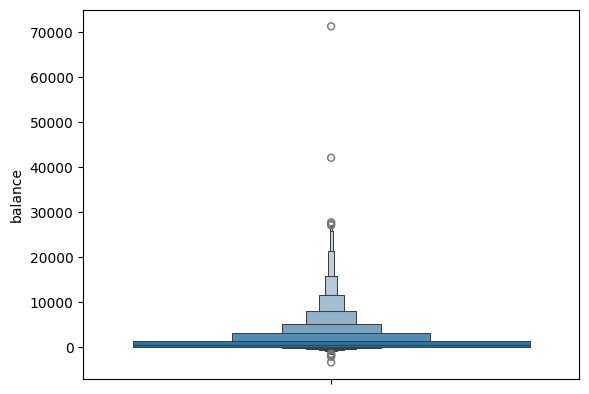

In [582]:
sns.boxenplot(dfc['balance'])
plt.show()

In [583]:
cat_col.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,other,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,telephone,jun,other,no
4,blue-collar,married,secondary,no,yes,no,telephone,may,other,no


In [584]:
mapping_biner = {
    'no': 0,
    'yes': 1
}
for col in cat_col[['default', 'housing', 'loan', 'y']]:
    cat_col[col] = cat_col[col].map(mapping_biner)
    dfc[col] = dfc[col].map(mapping_biner)

In [585]:
mappings_month = (
    {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
)
cat_col['month'] = cat_col['month'].map(mappings_month)
dfc['month'] = dfc['month'].map(mappings_month)

In [586]:
mapping_job = {
    'unemployed': 0, 
    'services': 1, 
    'management': 2, 
    'blue-collar': 3, 
    'self-employed': 4,
    'technician': 5,
    'entrepreneur': 6, 
    'admin.': 7, 
    'student': 8, 
    'housemaid': 9, 
    'retired': 10
}
cat_col['job'] = cat_col['job'].map(mapping_job)
dfc['job'] = dfc['job'].map(mapping_job)

In [587]:
mappings_marital = {
    'single': 1,
    'married': 2,
    'divorced': 0
}
cat_col['marital'] = cat_col['marital'].map(mappings_marital)
dfc['marital'] = dfc['marital'].map(mappings_marital)

In [588]:
mapping_poutcome = {
    'failure': 0,
    'other': 1,
    'success': 2
}
cat_col['poutcome'] = cat_col['poutcome'].map(mapping_poutcome)
dfc['poutcome'] = dfc['poutcome'].map(mapping_poutcome)

In [589]:
dfc['contact'].value_counts()

contact
cellular     2896
telephone    1625
Name: count, dtype: int64

In [590]:
mapping_contact = {
    'cellular': 1,
    'telephone': 0
}
cat_col['contact'] = cat_col['contact'].map(mapping_contact)
dfc['contact'] = dfc['contact'].map(mapping_contact)

In [591]:
mapping_education = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2,
}
cat_col['education'] = cat_col['education'].map(mapping_education)
dfc['education'] = dfc['education'].map(mapping_education)

In [592]:
dfc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,2,0,0,1787,0,0,1,19,10,79,1,-1,0,1,0
1,33,1,2,1,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,2,1,2,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,2,2,2,0,1476,1,1,0,3,6,199,4,-1,0,1,0
4,59,3,2,1,0,0,1,0,0,5,5,226,1,-1,0,1,0


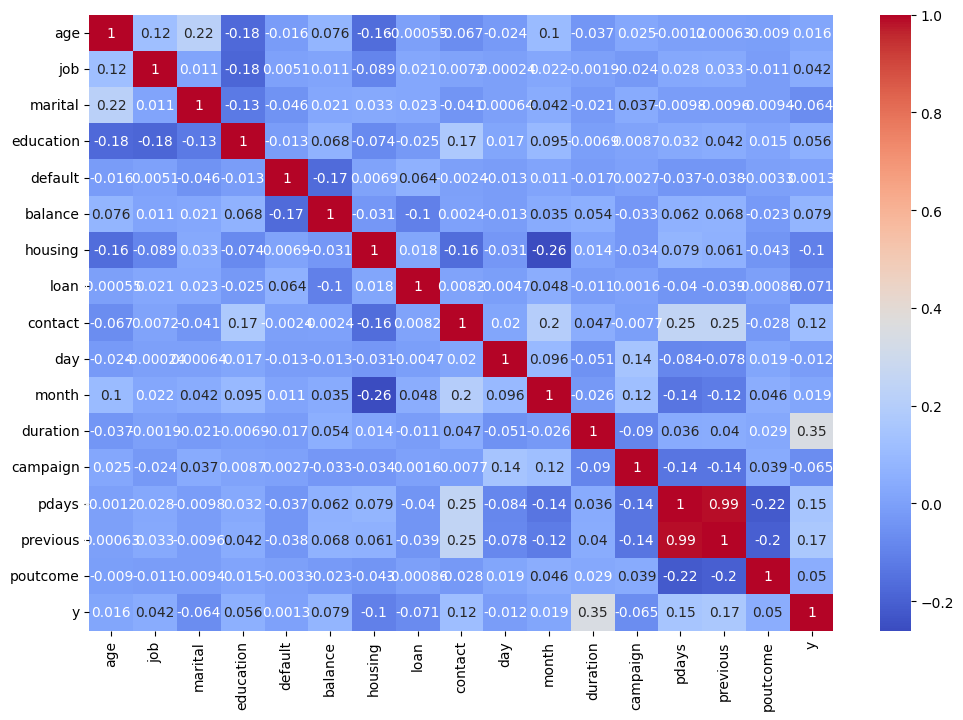

In [593]:
plt.figure(figsize=(12,8))
sns.heatmap(dfc.corr('spearman'), annot=True,cmap='coolwarm')
plt.show()

In [594]:
dfc.drop(columns=['pdays','day','month'], inplace=True)

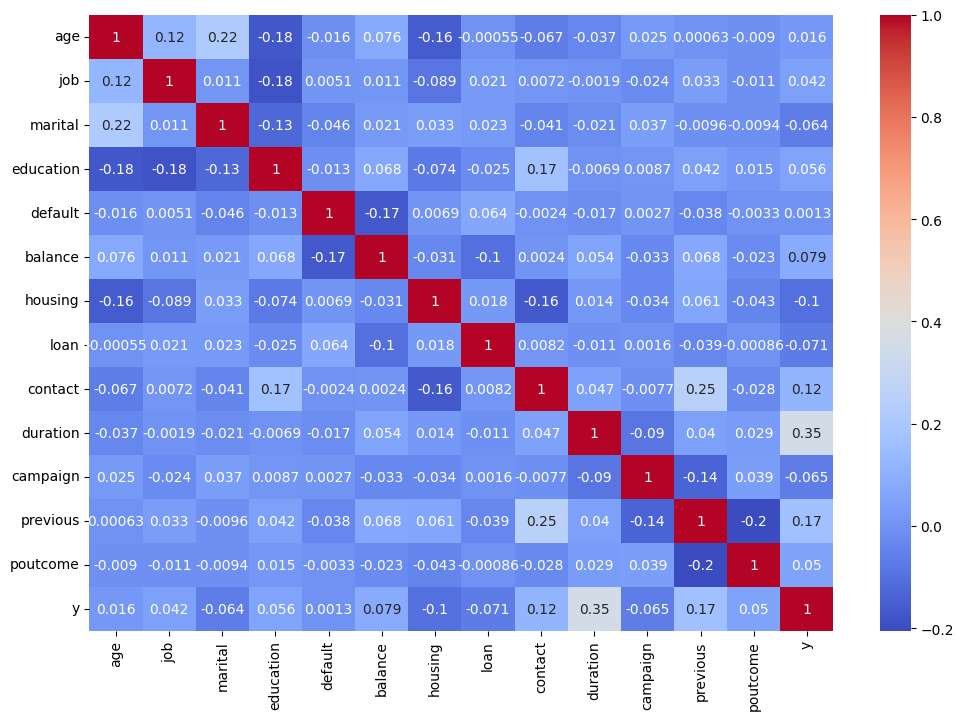

In [595]:
plt.figure(figsize=(12,8))
sns.heatmap(dfc.corr('spearman'), annot=True,cmap='coolwarm')
plt.show()

In [596]:
dfc.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,30,0,2,0,0,1787,0,0,1,79,1,0,1,0
1,33,1,2,1,0,4789,1,1,1,220,1,4,0,0
2,35,2,1,2,0,1350,1,0,1,185,1,1,0,0
3,30,2,2,2,0,1476,1,1,0,199,4,0,1,0
4,59,3,2,1,0,0,1,0,0,226,1,0,1,0


In [604]:
dfc[['previous']].value_counts()

previous
0           3705
1            286
2            193
3            113
4             78
5             47
6             25
7             22
8             18
9             10
12             5
10             4
11             3
14             2
13             1
15             1
17             1
18             1
19             1
20             1
22             1
23             1
24             1
25             1
Name: count, dtype: int64

In [598]:
dfc['total_duration'] = dfc['duration'] * dfc['campaign']
dfc['uncomfortable_campaign'] = df['campaign'].apply(lambda x: 0 if x < 5 else (1 if x < 10 else 2)) # 0 = comfy, 1 stalk, 2 = harassed
dfc['family_stability'] = (dfc['marital'] + dfc['housing'] - dfc['loan'] - dfc['default'])
dfc['engangement'] = (dfc['total_duration'] / 100) + (dfc['campaign'] + dfc['poutcome'] - dfc['uncomfortable_campaign']  + 10)**2
dfc['ease_of_contact'] = dfc['contact'] + dfc['education'] - dfc['housing']

In [599]:
dfc.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y,total_duration,uncomfortable_campaign,family_stability,engangement,ease_of_contact
0,30,0,2,0,0,1787,0,0,1,79,1,0,1,0,79,0,2,144.79,1
1,33,1,2,1,0,4789,1,1,1,220,1,4,0,0,220,0,2,123.20,1
2,35,2,1,2,0,1350,1,0,1,185,1,1,0,0,185,0,2,122.85,2
3,30,2,2,2,0,1476,1,1,0,199,4,0,1,0,796,0,2,232.96,1
4,59,3,2,1,0,0,1,0,0,226,1,0,1,0,226,0,3,146.26,0


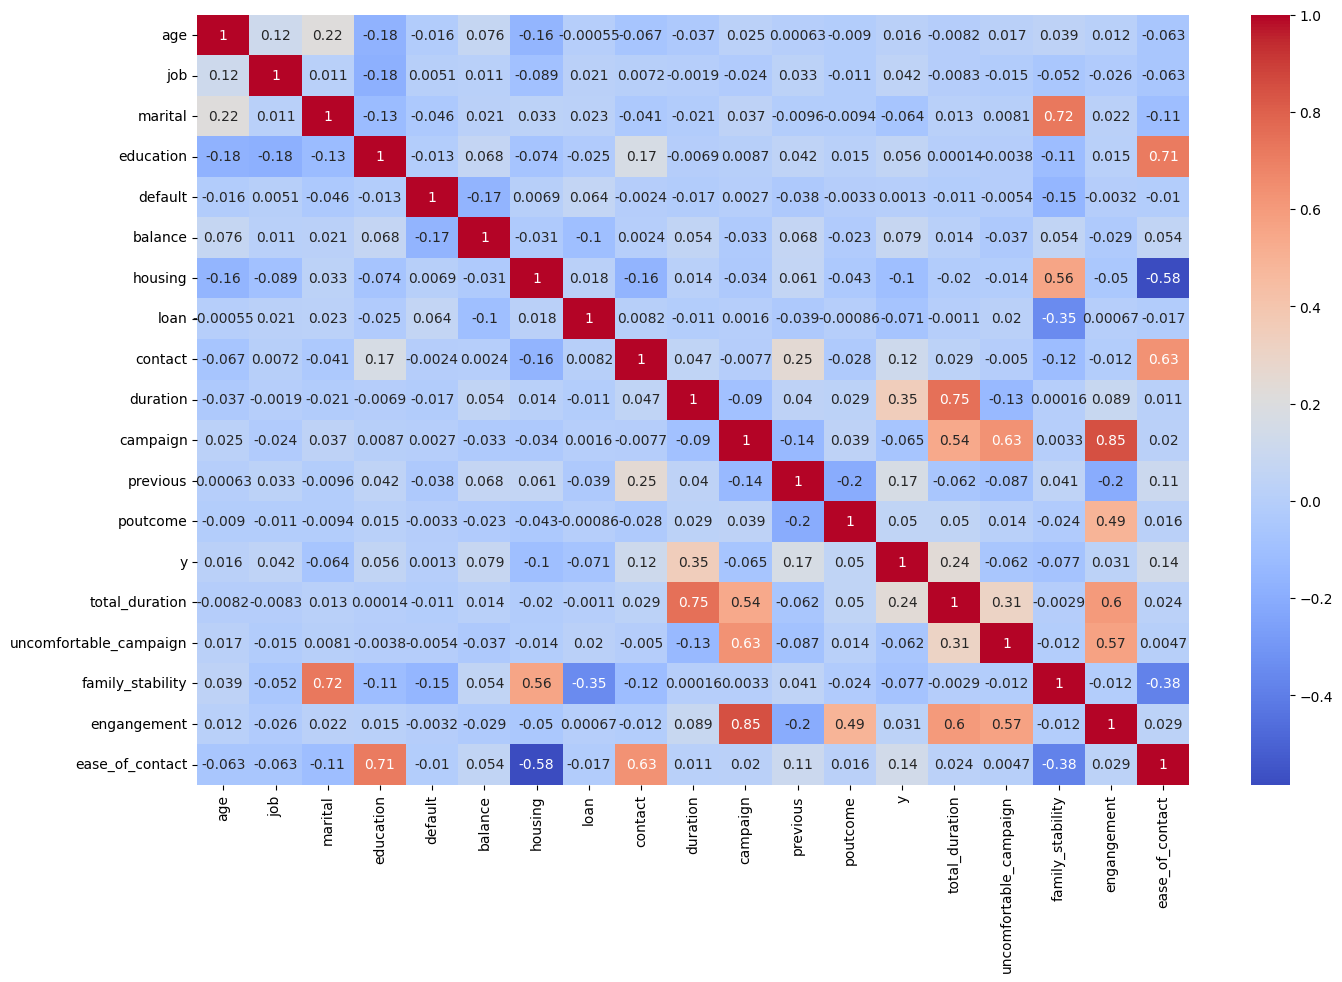

In [600]:
plt.figure(figsize=(16,10))
sns.heatmap(dfc.corr('spearman'), annot=True,cmap='coolwarm')
plt.show()

In [601]:
dfc.drop(columns=['age','job','default','education','poutcome'],inplace=True)

In [607]:
df['previous'].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
18       1
13       1
19       1
15       1
24       1
17       1
22       1
23       1
25       1
Name: count, dtype: int64

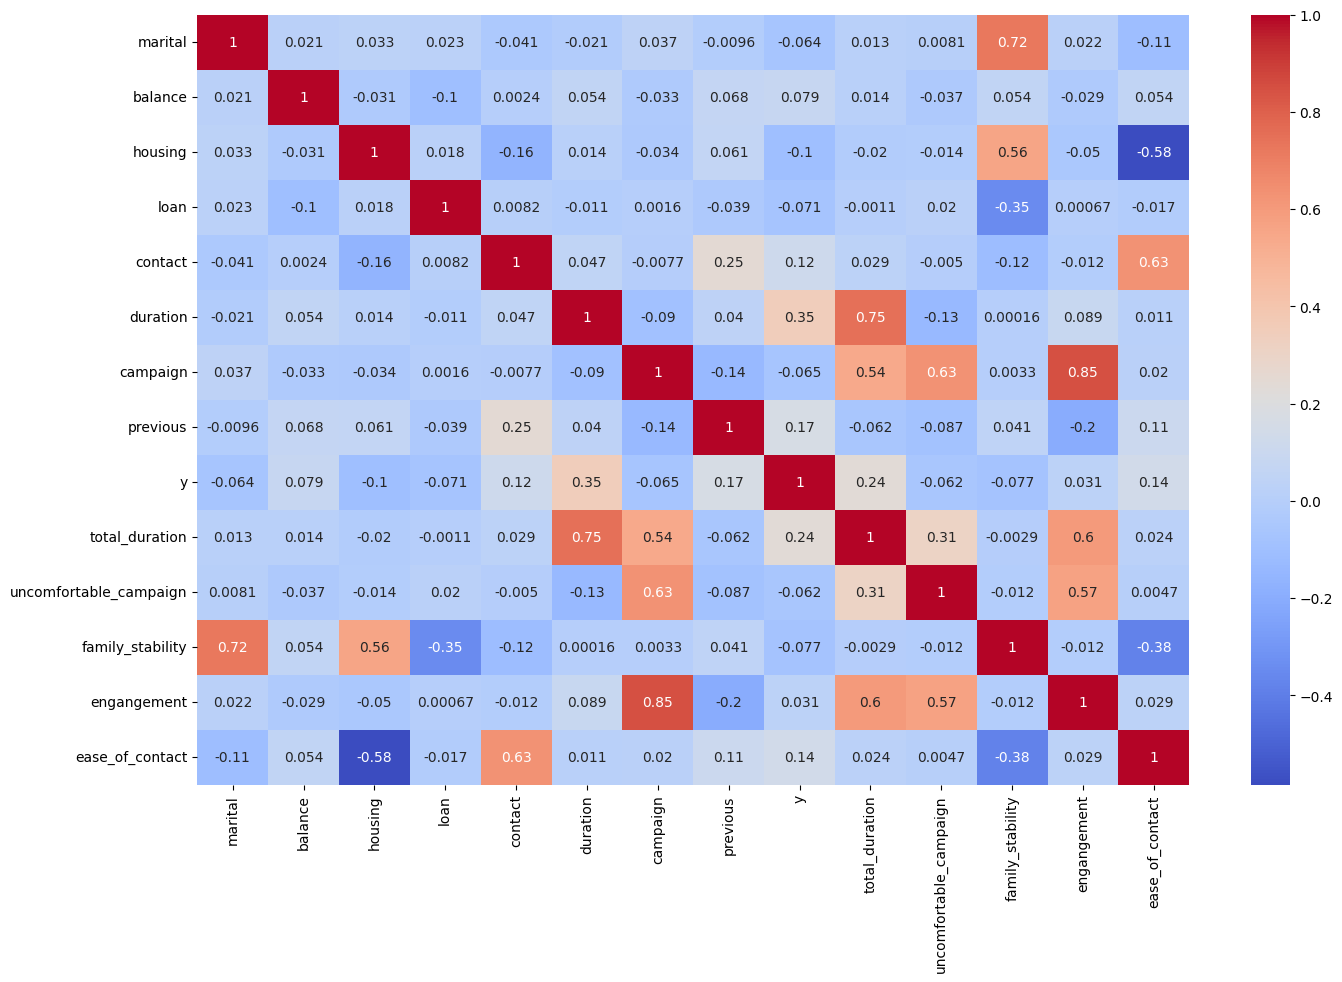

In [602]:
plt.figure(figsize=(16,10))
sns.heatmap(dfc.corr('spearman'), annot=True,cmap='coolwarm')
plt.show()

In [603]:
# outlier_counts = {}
# for col in num_col.columns:
#     q1 = num_col[col].quantile(0.25)
#     q3 = num_col[col].quantile(0.75)
#     iqr = q3 - q1
#     lwr = q1 - 1.5 * iqr
#     upr = q3 + 1.5 * iqr
#     outliers = num_col[(num_col[col] < lwr) | (num_col[col] > upr)]
#     outlier_counts[col] = outliers.shape[0]
#     df.loc[(num_col[col] < lwr) | (num_col[col] > upr), col] = round(df[col].mean())

# outlier_counts

# **• Tahap 3: Implementasi Machine Learning (KNN)**

### Setelah melakukan pre-processing, peserta akan mengimplementasikan algoritma K-Nearest Neighbors (KNN) untuk klasifikasi. 